# Lab 8: Define and Solve an ML Problem of Your Choosing

In [92]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [93]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataSet_filename)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Book Review dataset
2. I plan to predict whether a review is helpful or not. The label is 'Helpful Review' which I will add to the dataset.
3. This is a supervised learning problem. It is a classification problem, specifically a binary classification since there are two classes: 'helpful' and 'not helpful'. 
4. The current features in the dataset are 'Review' and 'Positive Review.' I will add the label 'Helpful Review.'
5. This is an important problem because a company may want to filter to show helpful reviews to customers first.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [94]:
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [95]:
# (rows, cols)
df.shape

(1973, 2)

In [96]:
# inspect the data type of each column
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [97]:
# check for missing values
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [98]:
# show first ten rows of the dataset
df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [99]:
# check class distribution in 'Positive Review'
df['Positive Review'].value_counts(normalize=True) * 100

False    50.329448
True     49.670552
Name: Positive Review, dtype: float64

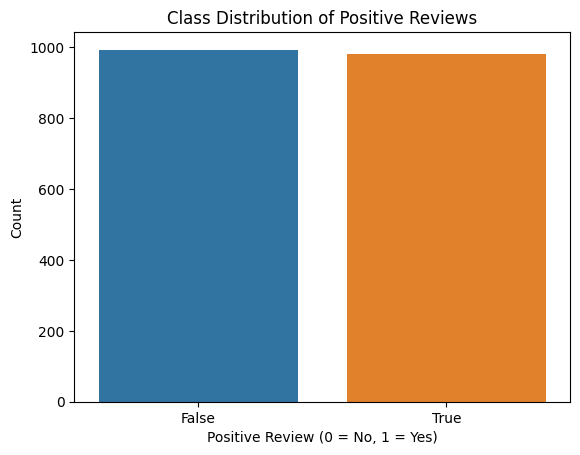

In [100]:
# visualize the class distribution
sns.countplot(x='Positive Review', data=df)
plt.xlabel('Positive Review (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Class Distribution of Positive Reviews')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- Yes I have a new feature list. The feature I will keep is 'Review'. The feature I will remove is 'Positive Review' since a helpful review can be either positive or negative. I will also add additional features so my model has more data to work with.
- To preprare my data for modeling, I looked to see if there were any missing values that needed replacing. Fortunately, there were none. I will remove the irrelevant feature 'Positive Review' and use feature engineering to create my label 'Helpful Review', as well as other features that measure the length of the review, number of exclamation points, number of question marks, and number of periods in the review to improve my model's performance.
- I will first attempt to use a Logistic Regression to see if I can get a good enough performance using a simple model. However, if the performance is poor, I will switch to a Random Forest Classifier model, which is more effective at handling nonlinear data. 
- I will split the data into training and test sets, and train the logisitic regression model on the training set. Then, I will evaluate its performance by testing the model on the test set and looking at its confusion matrix, and its accruacy, precision, and recall scores. To improve the model, I will use grid search cross-validiation to adjust its hyperparameter accordingly. If the performance is still not good, I will consider using a random forest model instead.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [101]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [102]:
# remove 'Positive Review' column
# irrelevant because a helpful review can be both positive or negative
df.drop(columns=['Positive Review'], inplace=True)

In [103]:
# Use feature engineering to add the label ('Helpful Review')
def is_helpful_review(text):
    # analyze text 
    word_count = len(text.split())
    has_periods = '.' in text
    has_exclamation = '!' in text
    has_question = '?' in text
    has_commas = ',' in text
    has_paragraphs = '\n' in text

    pos_keywords = ['great', 'amazing', 'excellent', 'loved', 'helpful', 'enjoyed', 'impressed', 'fun', 'enjoyable']
    neg_keywords = ['boring', 'bad', 'terrible', 'disappointing', 'dumb', 'hated', 'disliked']

    keyword_hits = sum(word in text.lower() for word in pos_keywords + neg_keywords)

    # add to score if the review is long, uses good grammar, and uses helpful keywords
    score = 0
    if word_count > 50:
        score += 1
    if has_periods and has_commas:
        score += 1
    if has_exclamation or has_question:
        score += 1
    if has_paragraphs:
        score += 1
    if keyword_hits > 0:
        score += 1

    # review is helpful if accumulates a score of at least 4 
    return 1 if score >= 4 else 0

# Apply it
df['Helpful Review'] = df['Review'].apply(is_helpful_review)


In [104]:
df.head(25)

,Review,Helpful Review
0,This was perhaps the best of Johannes Steinhof...,1
1,This very fascinating book is a story written ...,0
2,The four tales in this collection are beautifu...,1
3,The book contained more profanity than I expec...,0
4,We have now entered a second time of deep conc...,0
5,I don't know why it won the National Book Awar...,1
6,The daughter of a prominent Boston doctor is d...,1
7,I was very disapointed in the book.Basicly the...,0
8,I think in retrospect I wasted my time on this...,1
9,I have a hard time understanding what it is th...,1


In [105]:
# check for class imbalances and adjust criteria for helpful review accordingly
df['Helpful Review'].value_counts()

1    1029
0     944
Name: Helpful Review, dtype: int64

In [106]:
# get the class perecentage 
df['Helpful Review'].value_counts(normalize=True) * 100

1    52.15408
0    47.84592
Name: Helpful Review, dtype: float64

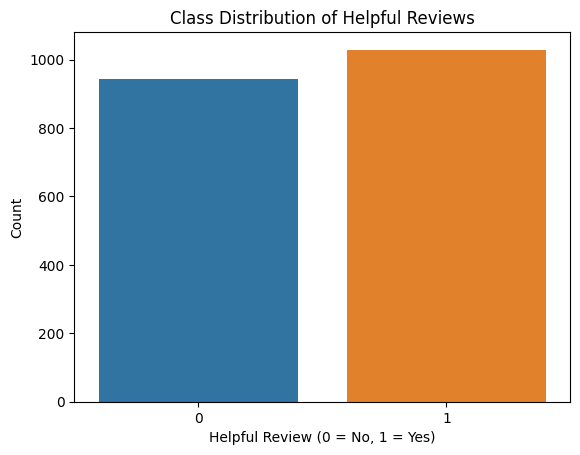

In [107]:
# visualize the class distribution
sns.countplot(x='Helpful Review', data=df)
plt.xlabel('Helpful Review (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Class Distribution of Helpful Reviews')
plt.show()

In [108]:
# Add more features to the dataset 
def review_length(text):
    return len(text.split())

def num_punctuation(text, char):
    return text.count(char)

df['num_exclamation'] = df['Review'].apply(lambda x: num_punctuation(x, '!'))
df['num_question'] = df['Review'].apply(lambda x: num_punctuation(x, '?'))
df['num_periods'] = df['Review'].apply(lambda x: num_punctuation(x, '.'))
df['length'] = df['Review'].apply(review_length)

In [109]:
df.head(10)

,Review,Helpful Review,num_exclamation,num_question,num_periods,length
0,This was perhaps the best of Johannes Steinhof...,1,0,0,4,86
1,This very fascinating book is a story written ...,0,0,0,11,249
2,The four tales in this collection are beautifu...,1,0,0,4,73
3,The book contained more profanity than I expec...,0,0,0,2,32
4,We have now entered a second time of deep conc...,0,0,0,20,371
5,I don't know why it won the National Book Awar...,1,0,1,2,28
6,The daughter of a prominent Boston doctor is d...,1,0,1,11,172
7,I was very disapointed in the book.Basicly the...,0,0,0,5,70
8,I think in retrospect I wasted my time on this...,1,1,0,5,155
9,I have a hard time understanding what it is th...,1,0,0,18,233


In [110]:
# Assign the label
y = df['Helpful Review']

# Assign the feature after TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=5, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Review'])
other_features = df[['num_exclamation', 'num_question', 'num_periods', 'length']].values

# combine the TF-IDF matrix with the other features matrix
X = hstack([X_tfidf, other_features])

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

# train the logisitic regression model on the training set 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [111]:
# Test the logisitc regression model on the test set

# 1. Make predictions on the test data using the predict_proba() method
proba_predictions = model.predict_proba(X_test)[:, 1]  

# 2. Make class label predictions
class_label_predictions = model.predict(X_test)

# 3. Evaluate the accruacy using a confusion matrix
confusion_matrix(y_test, class_label_predictions)


array([[67, 20],
       [22, 89]])

In [112]:
# Print the accruacy, precision, and recall scores
accuracy = accuracy_score(y_test, class_label_predictions)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test, class_label_predictions)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test, class_label_predictions)
print(f'Recall: {recall:.4f}')

Accuracy: 0.7879
Precision: 0.8165
Recall: 0.8018


In [113]:
# Create a dictionary called param_grid that contains 10 possible hyperparameter values for  𝐶
cs = [10**i for i in range(-5, 5)]
param_grid = {'C': cs}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [114]:
# Perform grid search cross-validation
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
lr = LogisticRegression(max_iter=2000) 

# 2. Run a grid search with 5-fold cross-validation
grid = GridSearchCV(lr, param_grid, cv=5)
    
# 3. Fit the model on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [115]:
# Retrieve the value of the hyperparameter C for which the best score was attained.
best_C = grid_search.best_score_
best_C

0.8078873239436619

In [116]:
model_best = LogisticRegression(max_iter=1000, C=best_C)
model_best.fit(X_train, y_train)

LogisticRegression(C=0.8078873239436619, max_iter=1000)

In [117]:
# Evaluate the new model with the adjusted C hyperparameter
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]  
class_label_predictions = model_best.predict(X_test)
confusion_matrix(y_test, class_label_predictions)

array([[66, 21],
       [22, 89]])

In [118]:
# Print the new accruacy, precision, and recall scores
accuracy_best = accuracy_score(y_test, class_label_predictions)
print(f'Accuracy: {accuracy_best:.4f}')

precision_best = precision_score(y_test, class_label_predictions)
print(f'Precision: {precision_best:.4f}')

recall_best = recall_score(y_test, class_label_predictions)
print(f'Recall: {recall_best:.4f}')

Accuracy: 0.7828
Precision: 0.8091
Recall: 0.8018


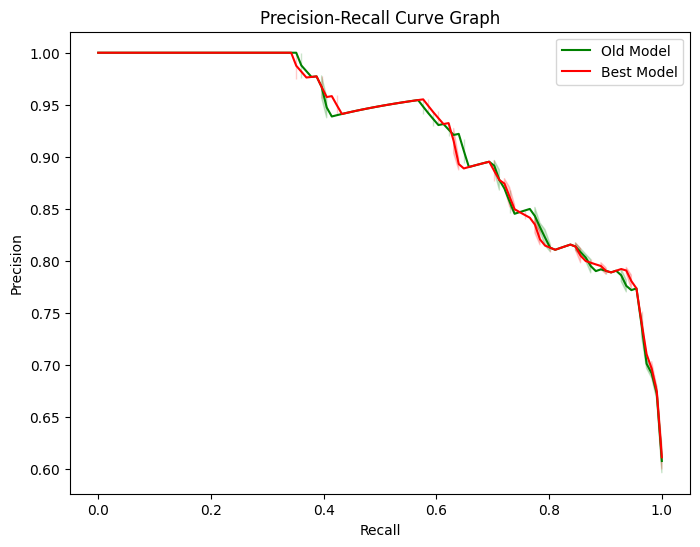

In [119]:
# Compare the old logistic regression model with the best one 
precision, recall, thresholds_default = precision_recall_curve(y_test, proba_predictions) 
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

plt.figure(figsize=(8, 6))
sns.lineplot(x = recall, y=precision, color='green', label='Old Model')
sns.lineplot(x = recall_best, y=precision_best, color='red', label ='Best Model')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Graph')
plt.legend()
plt.show()

- The accuracy and precision score actually decreased after fine-tuning the C hyperparameter which goes against expectations.
- I tried adjusting the hyperparameters but the scores stay the same or barely change at all. This suggests the current model may be underpowered or too limited in complexity for the problem.
- I will switch to a Random Forest Classifier, a more advanced model. 

In [120]:
# Using a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# calculate scores
acc_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)

# print scores
print(f'Accuracy: {acc_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8485
Precision: 0.8584
Recall: 0.8739
[[71 16]
 [14 97]]


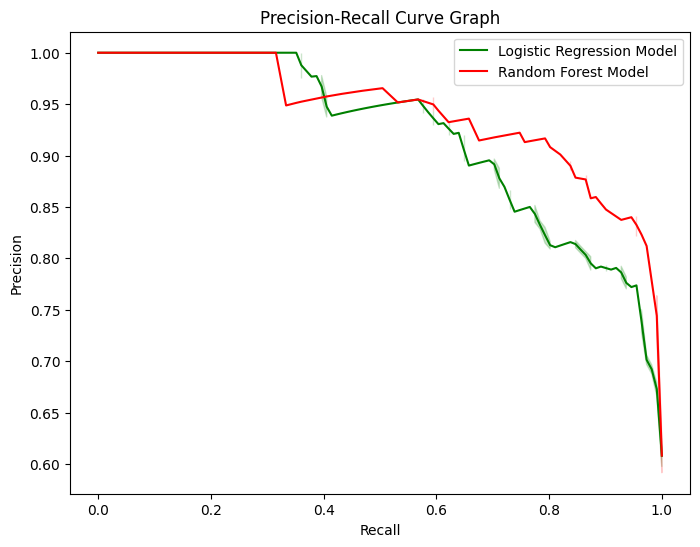

In [121]:
# Visualize the performance of the old model (logisitic regression) v.s. the new one (random forest)
proba_predictions_rf = rf_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds_default = precision_recall_curve(y_test, proba_predictions) 
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, proba_predictions_rf)

plt.figure(figsize=(8, 6))
sns.lineplot(x = recall, y=precision, color='green', label='Logistic Regression Model')
sns.lineplot(x = recall_rf, y=precision_rf, color='red', label ='Random Forest Model')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Graph')
plt.legend()
plt.show()

- The random forest model performs better overall compared to the logisitic regression model. I will continue to fine-tune the random forest model

In [122]:
# create paramater grid 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Grid search cross-validation
print('Running Grid Search...')
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print('Done')

Running Grid Search...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=None, max_depth=10, max_features=log2, min_samples_leaf=1, 

In [123]:
rf_best = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [124]:
# Evaluate the model w/ best hyperparameters 
y_pred = rf_best.predict(X_test)

# calculate scores
acc_rf_best = accuracy_score(y_test, y_pred)
precision_rf_best = precision_score(y_test, y_pred)
recall_rf_best = recall_score(y_test, y_pred)

# print scores
print(f'Accuracy: {acc_rf_best:.4f}')
print(f'Precision: {precision_rf_best:.4f}')
print(f'Recall: {recall_rf_best:.4f}')

Accuracy: 0.8737
Precision: 0.8707
Recall: 0.9099


- Notice the accuracy and recall scores went up after optimizing its hyperparameters.

Plotting ROC Curve...


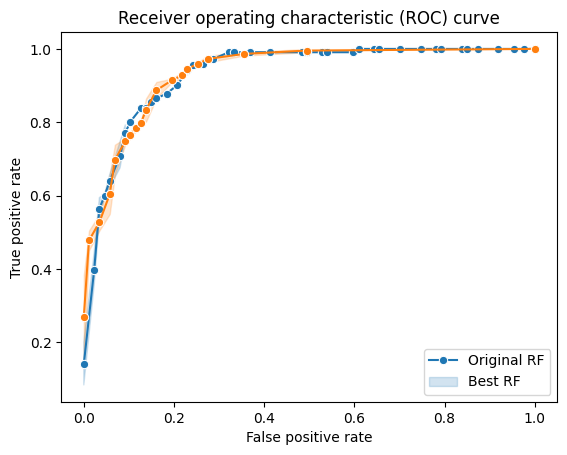

In [125]:
# ROC curve for original RF
rf_preds = rf_model.predict_proba(X_test)
rf_predictions = list(rf_preds[:, -1])
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)

# ROC curve for best RF
rf_best_preds = rf_best.predict_proba(X_test)
rf_best_predictions = list(rf_best_preds[:, -1])
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, rf_best_predictions)

print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr, y=tpr, marker = 'o')
sns.lineplot(x=fpr_best, y=tpr_best, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['Original RF', 'Best RF'])
plt.show()

In [126]:
# AUC for original RF
auc_rf = auc(fpr, tpr)
print("AUC of the Original RF model is {:.3f}".format(auc_rf))

# AUC for best RF
auc_rf_best = auc(fpr_best, tpr_best)
print("AUC of the Best RF model is {:.3f}".format(auc_rf_best))

AUC of the Original RF model is 0.935
AUC of the Best RF model is 0.939
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_s

- The auc (area under the curve) score is higher for the best RF model which is expected.
- Our final model is the best RF model. 